# linear regression

## import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import train
import predict

from srcs.functions import normalize, predict, cost, fit, set_theta_after_norm
from srcs.files import get_theta_in_args, check_theta, export_theta, import_data

## plot functions

In [3]:
def plot_point_and_line(X, y, theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([min(X), max(X)])
    ax.set_ylim([min(y), max(y)])
    ax.scatter(X, y)
    line_x = np.linspace(min(X), max(X), 100)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()

In [4]:
def plot_cost(J_history):
    fit_ = plt.figure()
    ax = plt.axes()
    ax.plot(J_history)

In [51]:
def predict_and_plot(predict_data, X, y, theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([min(X), max(X)])
    ax.set_ylim([min(y), max(y)])
    ax.scatter(X, y)
    ax.scatter(predict_data, predict(predict_data, theta), c='r')
    line_x = np.linspace(min(X), max(X), 100)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()

## import data

In [5]:
data, X, y = import_data(train.all_args)

In [6]:
data.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


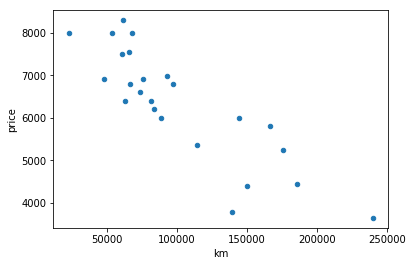

In [7]:
data.plot.scatter('km', 'price')

## linear regression

### normalize data

In [10]:
norm_X = normalize(X)
print('X')
print(X)
print('X normalized (all values btw 0 and 1)')
print(norm_X)

X
[240000 139800 150500 185530 176000 114800 166800  89000 144500  84000
  82029  63060  74000  97500  67000  76025  48235  93000  60949  65674
  54000  68500  22899  61789]
X normalized (all values btw 0 and 1)
[1.         0.53846366 0.58774948 0.74910295 0.70520633 0.42330989
 0.66282974 0.30447119 0.56011257 0.28144044 0.27236171 0.18498763
 0.23537893 0.34362347 0.20313587 0.24470638 0.11670144 0.3228958
 0.17526405 0.19702811 0.1432559  0.21004509 0.         0.17913321]


### fit and save the cost

In [103]:
# this  function find the theta for normalized parameter (btw 0 and 1)
theta, J_history = fit(norm_X, y, [0, 0], 0.1, 3500, cost_function=cost)

### update theta

In [104]:
# the theta is calculated with normalized data so we need to update it
print('theta before:', theta)
theta = set_theta_after_norm(X, theta)
print('theta after:', theta)

theta before: [8008.43976321549, -4656.591261457204]
theta after: [8499.599561171779, -0.021448962747556227]


### plot result

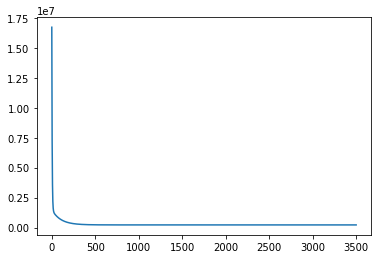

In [105]:
plot_cost(J_history)

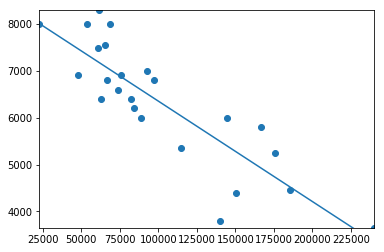

In [106]:
plot_point_and_line(X, y, theta)

## predict result

In [107]:
predict(200000, theta)

4209.807011660533

In [108]:
predict(np.array([123000, 56000]), theta)

array([5861.37714322, 7298.45764731])

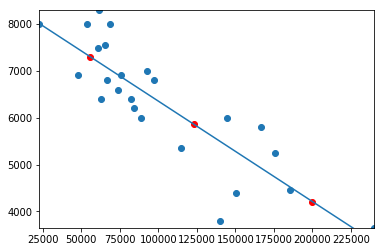

In [109]:
predict_and_plot(np.array([123000, 56000, 200000]), X, y, theta)